In [6]:
import os
import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas as pd 
pd.set_option("display.max.columns",None)
plt.style.use('seaborn')

In [7]:
diabetes = pd.read_csv('../data/diabetes_data.csv')
stroke = pd.read_csv('../data/stroke_data.csv')
hypertension = pd.read_csv('../data/hypertension_data.csv')

## Introduction

Cardiovascular diseases (CVDs) are the leading cause of mortality globally. 

- Identifying the risk factors associated with cardiovascular health can significantly contribute to preventive healthcare. 


- Diabetes is a well-known risk factor for various cardiovascular diseases. 


This exploratory analysis aims to understand how different factors such as lifestyle choices, demographic characteristics, and other health conditions relate to the incidence of diabetes and, indirectly, to cardiovascular risk.

##  Analyse de risque cardiovasculaire

Croiser des variables de bien etre avec des variables de santé 
La probabilité d'avoir une maladie cardiaque en fonction de l'age 
 
- Age 13-level age category (_AGEG5YR see codebook) 1 = 18-24 9 = 60-64 13 = 80 or older

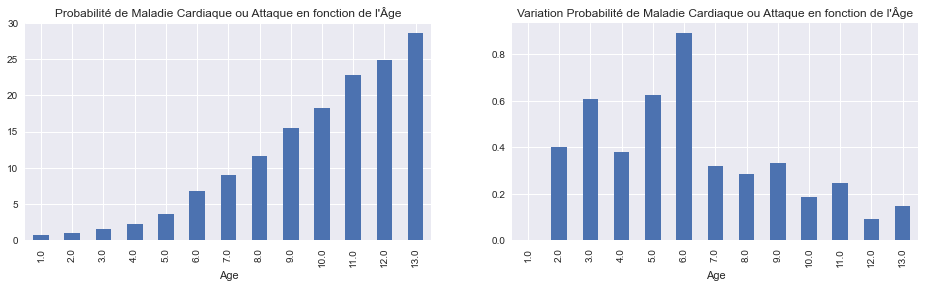

In [8]:
plt.figure(figsize=(16,4))

plt.subplot(1,2,1)
plt.title("Probabilité de Maladie Cardiaque ou Attaque en fonction de l'Âge")
(diabetes.groupby('Age')['HeartDiseaseorAttack'].apply(lambda x : x.sum()/len(x))*100).plot.bar()

plt.subplot(1,2,2)
plt.title("Variation Probabilité de Maladie Cardiaque ou Attaque en fonction de l'Âge")
(diabetes.groupby('Age')['HeartDiseaseorAttack'].apply(lambda x : x.sum()/len(x))*100).pct_change().plot.bar()


plt.show()

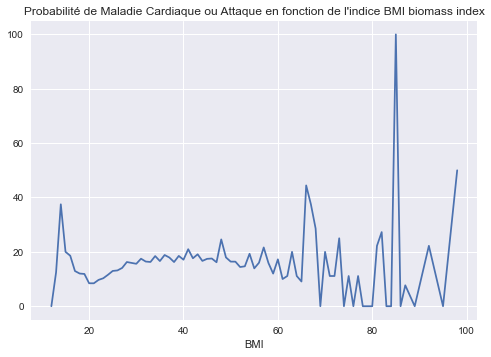

In [9]:
plt.title("Probabilité de Maladie Cardiaque ou Attaque en fonction de l'indice BMI biomass index")
(diabetes.groupby('BMI')['HeartDiseaseorAttack'].apply(lambda x : x.sum()/len(x))*100).plot()
plt.show()

In [10]:
diabetes.groupby('Smoker')['HeartDiseaseorAttack'].apply(lambda x : x.sum()/len(x))*100

Smoker
0.0    10.578530
1.0    19.420799
Name: HeartDiseaseorAttack, dtype: float64

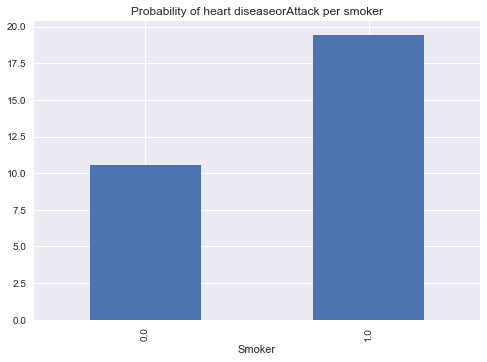

In [11]:
plt.title("Probability of heart diseaseorAttack per smoker")
(diabetes.groupby('Smoker')['HeartDiseaseorAttack'].apply(lambda x : x.sum()/len(x))*100).plot.bar()
plt.show()

In [12]:
diabetes.groupby('HighChol')['HeartDiseaseorAttack'].apply(lambda x : x.sum()/len(x))*100

HighChol
0.0     8.010976
1.0    20.889056
Name: HeartDiseaseorAttack, dtype: float64

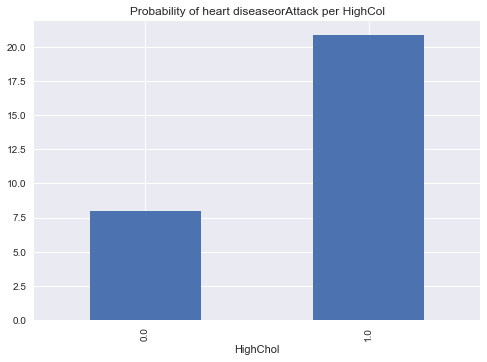

In [13]:
plt.title("Probability of heart diseaseorAttack per HighCol")
(diabetes.groupby('HighChol')['HeartDiseaseorAttack'].apply(lambda x : x.sum()/len(x))*100).plot.bar()
plt.show()

**2 fois plus de chances d'avoir une maladie d'avoir une maladie cardiaque si on a un taux de cholestérol élevé**

In [14]:
diabetes.groupby('CholCheck')['HeartDiseaseorAttack'].apply(lambda x : x.sum()/len(x))*100

CholCheck
0.0     5.088622
1.0    15.026906
Name: HeartDiseaseorAttack, dtype: float64

In [15]:
BMI_ABV_MEAN = (diabetes['HeartDiseaseorAttack'].to_frame()).join(\
                                                (diabetes['BMI'] > diabetes['BMI'].mean()).to_frame(name='BMI_ABV_MEAN'))\
                                               .groupby('BMI_ABV_MEAN')['HeartDiseaseorAttack'].apply(lambda x : x.sum()/len(x))*100                                          

La probabilité d'avoir une maladie cardiaque en fonction de BMI au dessus de la moyenne 

en valeur absolue 5 point proba passe de 12% à 17%

mais en proportion (17/12)-1 =0.33 au augmentation de 33%


en gros si je dis elle augmente de 5% j'ai raison et si je dis elle augmente de 33% j'ai aussi raison conclusion la terre est plateBMI_ABV_MEAN.plot.pie()

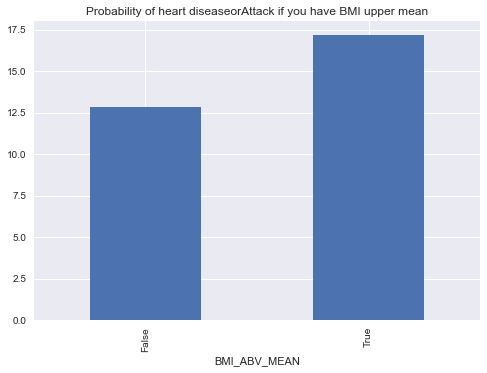

In [16]:
plt.title("Probability of heart diseaseorAttack if you have BMI upper mean")
BMI_ABV_MEAN.plot.bar()
plt.show()

## Correlation analysis

In [17]:
diabetes.corr()['HeartDiseaseorAttack'].sort_values(ascending=False)[1:]

GenHlth              0.275868
DiffWalk             0.232611
Stroke               0.223394
Age                  0.221878
Diabetes             0.211523
HighBP               0.210750
PhysHlth             0.198416
HighChol             0.181187
Smoker               0.124418
Sex                  0.098161
MentHlth             0.075057
BMI                  0.060355
CholCheck            0.043497
Fruits              -0.019436
Veggies             -0.036315
HvyAlcoholConsump   -0.037130
PhysActivity        -0.098223
Name: HeartDiseaseorAttack, dtype: float64

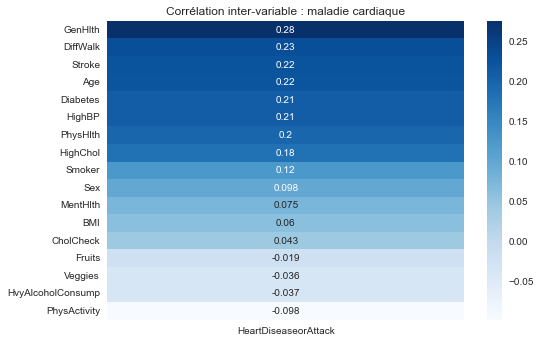

In [18]:
plt.title("Corrélation inter-variable : maladie cardiaque")
sns.heatmap(diabetes.corr()['HeartDiseaseorAttack'].sort_values(ascending=False)[1:].to_frame(),annot=True,cmap='Blues')
plt.show()

## Conclusion

This analysis has illuminated several critical aspects of cardiovascular risk factors, notably the impact of high cholesterol, elevated BMI, and smoking habits. Each factor significantly increases the risk of developing heart disease, a leading cause of mortality worldwide.

### Key Findings:

1. **High Cholesterol**: Individuals with high cholesterol levels have twice the likelihood of developing heart disease compared to those with normal levels. This finding underscores the critical need for effective cholesterol management as a cornerstone of heart disease prevention.

2. **Body Mass Index (BMI)**: An increase in BMI above the average leads to a 5% absolute increase in the risk of heart disease, translating to a 33% relative increase. This statistic emphasizes the importance of maintaining a healthy BMI through diet and physical activity as part of a comprehensive approach to reduce heart disease risk.

3. **Smoking**: The analysis confirms smoking as a major risk factor, nearly doubling the risk of heart disease. This highlights the urgent need for robust smoking cessation programs and policies to protect cardiovascular health.

### Implications for Public Health:

The findings from this analysis should be leveraged to inform public health strategies and interventions. Targeted efforts to reduce high cholesterol, manage BMI, and eliminate smoking can significantly lower the incidence of heart disease. Additionally, these results highlight the importance of nuanced health communication strategies that appropriately convey the risks in both absolute and relative terms to avoid misinterpretation.

### Future Directions:

Further research should focus on longitudinal studies to track the impact of these risk factors over time and to evaluate the effectiveness of various intervention strategies. Additionally, exploring the interplay between genetic factors and lifestyle choices could provide deeper insights into personalized medicine approaches in cardiovascular health.

By addressing these risk factors with informed, evidence-based strategies, we can significantly reduce the burden of cardiovascular disease and improve population health outcomes.

